In [1]:
import sys
print(sys.executable)

/home/user/ml_env/bin/python


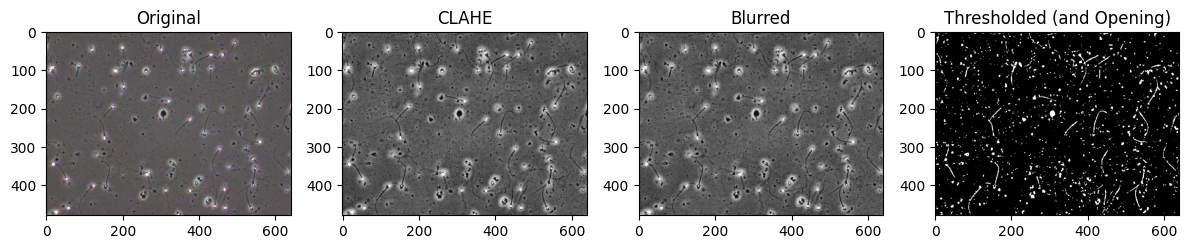

Image preprocessing complete.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(416, 416), clahe_clip_limit=2.0,
                     gaussian_ksize=(1, 1), adaptive_block_size=61, adaptive_c=30,
                     morph_open_ksize=(1, 1), output_path="preprocessed_image.jpg",
                     display_output=True):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    blurred_img = cv2.GaussianBlur(enhanced_img, gaussian_ksize, 0)

    thresh = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, adaptive_block_size, adaptive_c)

    kernel = np.ones(morph_open_ksize, np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    resized_img = cv2.resize(opening, target_size)
    normalized_img = resized_img / 255.0


    if display_output:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Correct color
        plt.title("Original")

        plt.subplot(1, 4, 2)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title("CLAHE")

        plt.subplot(1, 4, 3)
        plt.imshow(blurred_img, cmap='gray')
        plt.title("Blurred")

        plt.subplot(1, 4, 4)
        plt.imshow(opening, cmap='gray')
        plt.title("Thresholded (and Opening)")  #Corrected title

        plt.tight_layout() # Prevent titles from overlapping
        plt.show()
    else:
        cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
        print(f"Preprocessed image saved to {output_path}")


if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    preprocess_image(image_path, display_output=True)
    print("Image preprocessing complete.")


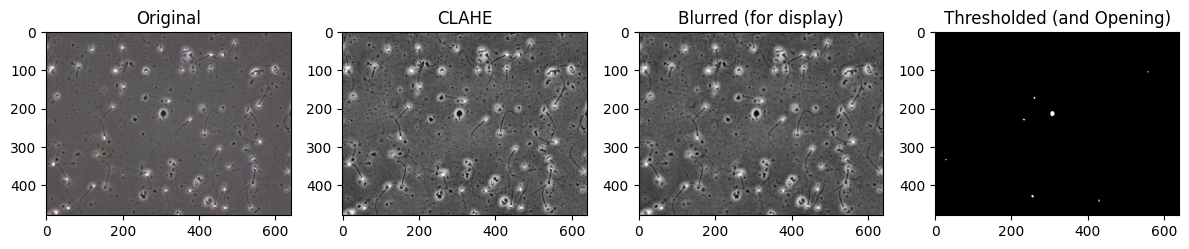

Image preprocessing complete.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(416, 416), clahe_clip_limit=2.0,
                     gaussian_ksize=(3, 3), adaptive_block_size=61, adaptive_c=40,
                     morph_open_ksize=(3, 3), output_path="preprocessed_image.jpg",
                     display_output=True):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    blurred_img = cv2.GaussianBlur(enhanced_img, gaussian_ksize, 0)

    # More aggressive blurring to reduce noise BEFORE thresholding, before it was done after
    blurred_img_for_thresh = cv2.GaussianBlur(enhanced_img, (15,15), 0)

    thresh = cv2.adaptiveThreshold(blurred_img_for_thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, adaptive_block_size, adaptive_c)

    # Morphological opening to remove small noise
    kernel = np.ones(morph_open_ksize, np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    resized_img = cv2.resize(opening, target_size)
    normalized_img = resized_img / 255.0


    if display_output:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Correct color
        plt.title("Original")

        plt.subplot(1, 4, 2)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title("CLAHE")

        plt.subplot(1, 4, 3)
        plt.imshow(blurred_img, cmap='gray')
        plt.title("Blurred (for display)") #Clarify

        plt.subplot(1, 4, 4)
        plt.imshow(opening, cmap='gray')
        plt.title("Thresholded (and Opening)")  #Corrected title

        plt.tight_layout() # Prevent titles from overlapping
        plt.show()
    else:
        cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
        print(f"Preprocessed image saved to {output_path}")


if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    preprocess_image(image_path, display_output=True)
    print("Image preprocessing complete.")


In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy==1.24.0

Note: you may need to restart the kernel to use updated packages.


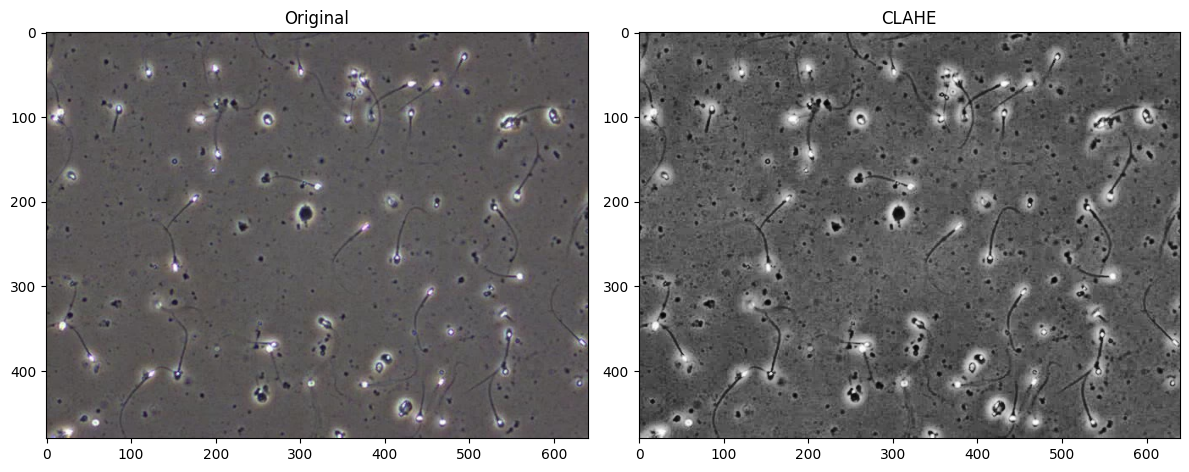

Image preprocessing complete.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(416, 416), clahe_clip_limit=2.0,
                     gaussian_ksize=(3, 3), output_path="preprocessed_image.jpg",
                     display_output=True):

    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    resized_img = cv2.resize(enhanced_img, target_size)
    normalized_img = resized_img / 255.0


    if display_output:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Correct color
        plt.title("Original")

        plt.subplot(1, 2, 2)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title("CLAHE")

        plt.tight_layout() # Prevent titles from overlapping
        plt.show()
    else:
        cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
        print(f"Preprocessed image saved to {output_path}")


if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    preprocess_image(image_path, display_output=True)
    print("Image preprocessing complete.")


In [1]:
pip uninstall scikit-image -y

Found existing installation: scikit-image 0.25.1
Uninstalling scikit-image-0.25.1:
  Successfully uninstalled scikit-image-0.25.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip cache purge

Files removed: 970 (4567.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-image --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 1.6 MB/s eta 0:00:000:00:010:00:01:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /home/user/ml_env/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.0 MB/s eta 0:00:0031m24.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
Note: you may need to restart the kernel to use updated packages.


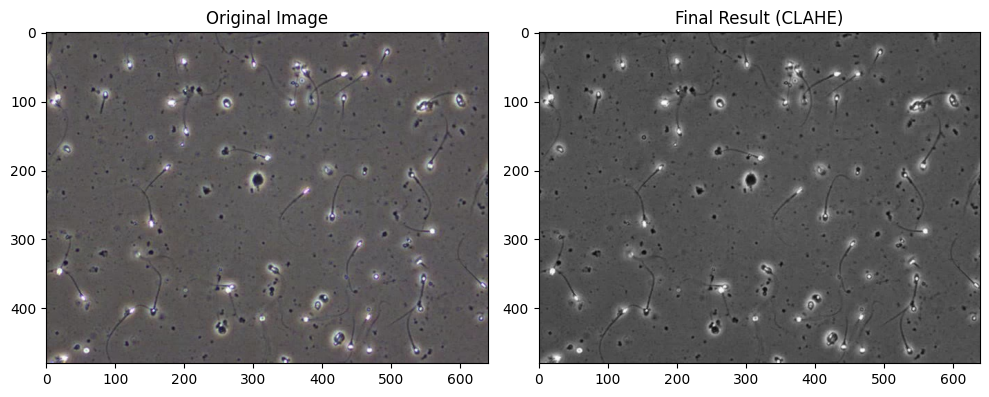

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, clahe_clip_limit=1.0, display_output=True):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)

    # No resizing: Maintain original resolution (640x480)

    # Display Intermediate and Final Results
    if display_output:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")

        plt.subplot(1, 2, 2)
        plt.imshow(clahe_img, cmap='gray')
        plt.title("Final Result (CLAHE)")

        plt.tight_layout()
        plt.show()

    return clahe_img #Returning CLAHE IMAGE

if __name__ == "__main__":
    image_path = '/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg'
    # Test Values, you should vary this based on your tests!
    preprocess_image(image_path,
                            clahe_clip_limit=1.0,
                            display_output=True)


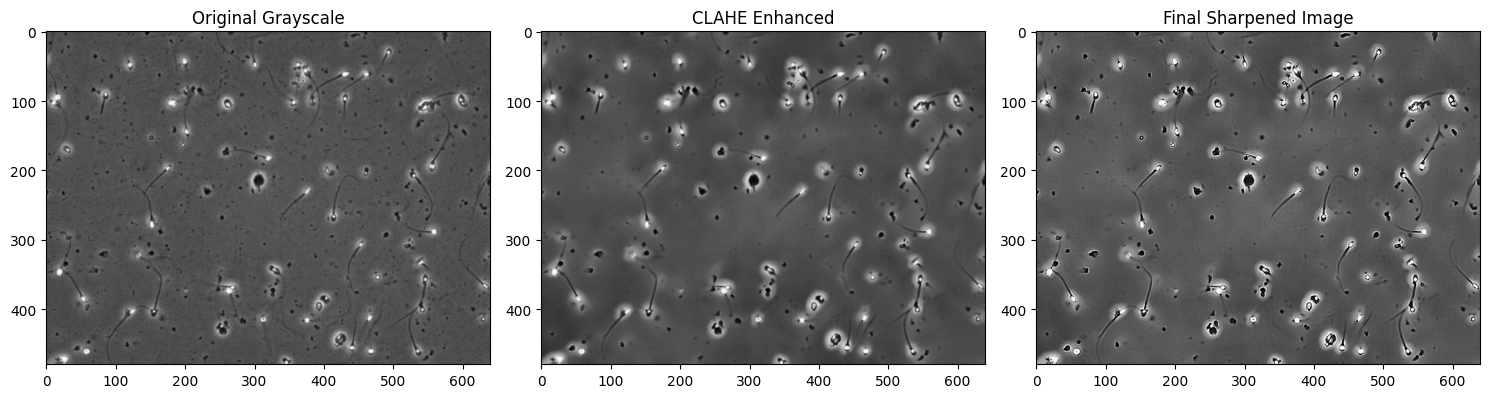

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, clahe_clip_limit=2.5, display_output=True):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step 1: Denoising to remove speckle noise
    denoised = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=21)

    # Step 2: CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=(8, 8))
    clahe_img = clahe.apply(denoised)

    # Step 3: Sharpening filter
    sharpening_kernel = np.array([[0, -1, 0], 
                                  [-1, 5, -1], 
                                  [0, -1, 0]])  # High-pass filter
    sharpened = cv2.filter2D(clahe_img, -1, sharpening_kernel)

    # Display results
    if display_output:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(gray, cmap='gray')
        plt.title("Original Grayscale")

        plt.subplot(1, 3, 2)
        plt.imshow(clahe_img, cmap='gray')
        plt.title("CLAHE Enhanced")

        plt.subplot(1, 3, 3)
        plt.imshow(sharpened, cmap='gray')
        plt.title("Final Sharpened Image")

        plt.tight_layout()
        plt.show()

    return sharpened  # Returning final processed image

# Usage example:
image_path = "/media/user/data/Mano/Mano-Project/Project-Mano/VISEM-Tracking/VISEM_Tracking_Train_v4/Train/11/images/11_frame_0.jpg"
preprocessed_image = preprocess_image(image_path, clahe_clip_limit=2.5, display_output=True)
